In [ ]:
import pandas as pd

# Load the data
file_path = r"household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Preview the data
df.head()


In [ ]:
import pandas as pd

# Step 1: Load the dataset
file_path = "household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Step 2: Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Step 3: Convert relevant columns to float
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 4: Create 'Datetime' column from 'Date' and 'Time'
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Step 5: Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Step 6: Drop original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Step 7: Drop rows with missing values
df.dropna(inplace=True)

# Step 8: Final check
print(df.info())
print(df.head())


In [6]:
# Save the cleaned full dataset
df.to_csv("cleaned_power_data.csv")


In [4]:
import pandas as pd

df = pd.read_csv('cleaned_power_data.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])  # convert to datetime


In [ ]:
df_filled = df.fillna(method='ffill').fillna(method='bfill')


In [7]:
df_filled['Year'] = df_filled['Datetime'].dt.year
df_filled['Month'] = df_filled['Datetime'].dt.month
df_filled['Day'] = df_filled['Datetime'].dt.day
df_filled['Hour'] = df_filled['Datetime'].dt.hour
df_filled['Weekday'] = df_filled['Datetime'].dt.day_name()


In [ ]:
import matplotlib.pyplot as plt

hourly_avg = df_filled.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(12,6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', color='teal')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_filled.set_index('Datetime')['Global_active_power'].resample('D').mean().plot(figsize=(14,6), title='Daily Average Power Usage', ylabel='kW')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_filled.select_dtypes(include=[float, int])

# Plot the heatmap for numeric columns only
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
sns.boxplot(x='Weekday', y='Global_active_power', data=df_filled)
plt.xticks(rotation=45)
plt.title('Power Usage by Weekday')
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_power_data.csv")  # Replace with your file
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.dtypes)
df.head()


In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
missing_df[missing_df['Missing Values'] > 0]


In [ ]:
df_cleaned = df.dropna()
print("New shape after dropna:", df_cleaned.shape)


In [ ]:
df.describe(include='object')


In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


In [ ]:
import numpy as np  # Make sure this line is included

# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Skewness and Kurtosis
print("Skewness:\n", numeric_data.skew())
print("\nKurtosis:\n", numeric_data.kurt())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Global_active_power', 'Global_reactive_power', 'Voltage']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature], kde=True, color='orange')
    plt.title(f'{feature} | Skew: {data[feature].skew():.2f}, Kurtosis: {data[feature].kurt():.2f}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

for col in df.select_dtypes(include=['float64', 'int64']):
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


In [29]:
# Example: Average numeric value by a category (replace as needed)
if 'CategoryColumn' in df.columns:
    print(df.groupby('CategoryColumn').mean(numeric_only=True))


In [25]:
if 'date' in df.columns or 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.day_name()
    print(df[['Date', 'Year', 'Month', 'DayOfWeek']].head())


In [30]:
df['RollingAvg_7days'] = df['Global_active_power'].rolling(window=7).mean()  # Example of a 7-day rolling average


In [8]:
import pandas as pd
df = pd.read_csv('cleaned_power_data.csv')



In [38]:
# Merge weather data with your energy data
cleaned_power_data = pd.read_csv('cleaned_power_data.csv')
df = pd.merge(df, cleaned_power_data, on='Datetime', how='left')


In [ ]:
print(df.columns)


In [ ]:
print(df.head())  # Check the first few rows to see if the column exists


In [4]:
# Use the '_x' version of the columns
df = df.rename(columns={
    'Global_active_power_x': 'Global_active_power',
    'Global_reactive_power_x': 'Global_reactive_power',
    'Voltage_x': 'Voltage',
    'Global_intensity_x': 'Global_intensity',
    'Sub_metering_1_x': 'Sub_metering_1',
    'Sub_metering_2_x': 'Sub_metering_2',
    'Sub_metering_3_x': 'Sub_metering_3'
})


In [5]:
X = df.drop(columns=['Global_active_power', 'Datetime'])  # Features
y = df['Global_active_power']  # Target variable


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# Drop rows with NaN values in features or target
df_clean = df.dropna()

# Redefine X and y
X = df_clean.drop(columns=['Global_active_power', 'Datetime'])
y = df_clean['Global_active_power']


In [12]:
from sklearn.impute import SimpleImputer

# Define your features and target
X = df.drop(columns=['Global_active_power', 'Datetime'])
y = df['Global_active_power']

# Fill missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)



In [ ]:
# Drop rows where y (target) is NaN
df_clean = df.dropna(subset=['Global_active_power'])

# Define X and y again from the cleaned DataFrame
X = df_clean.drop(columns=['Global_active_power', 'Datetime'])
y = df_clean['Global_active_power']

# Impute missing values in X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now you can fit the model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_imputed, y)


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import sqrt

y_pred = lr1.predict(X_imputed)

rmse = sqrt(mean_squared_error(y, y_pred))  # RMSE calculated manually
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


Linear Regression Performance:
RMSE: 0.0406
MAE: 0.0259
R-squared: 0.9985


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# RMSE manually calculated
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
mae_rf = mean_absolute_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print(f"Random Forest Performance:\nRMSE: {rmse_rf:.4f}\nMAE: {mae_rf:.4f}\nR-squared: {r2_rf:.4f}")


Random Forest Performance:
RMSE: 0.0148
MAE: 0.0087
R-squared: 0.9998


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Use squared=True (default), then take the square root manually
mse = mean_squared_error(y, y_pred_gb)
rmse_gb = np.sqrt(mse)
mae_gb = mean_absolute_error(y, y_pred_gb)
r2_gb = r2_score(y, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")


Gradient Boosting Performance:
RMSE: 0.0345
MAE: 0.0216
R-squared: 0.9989


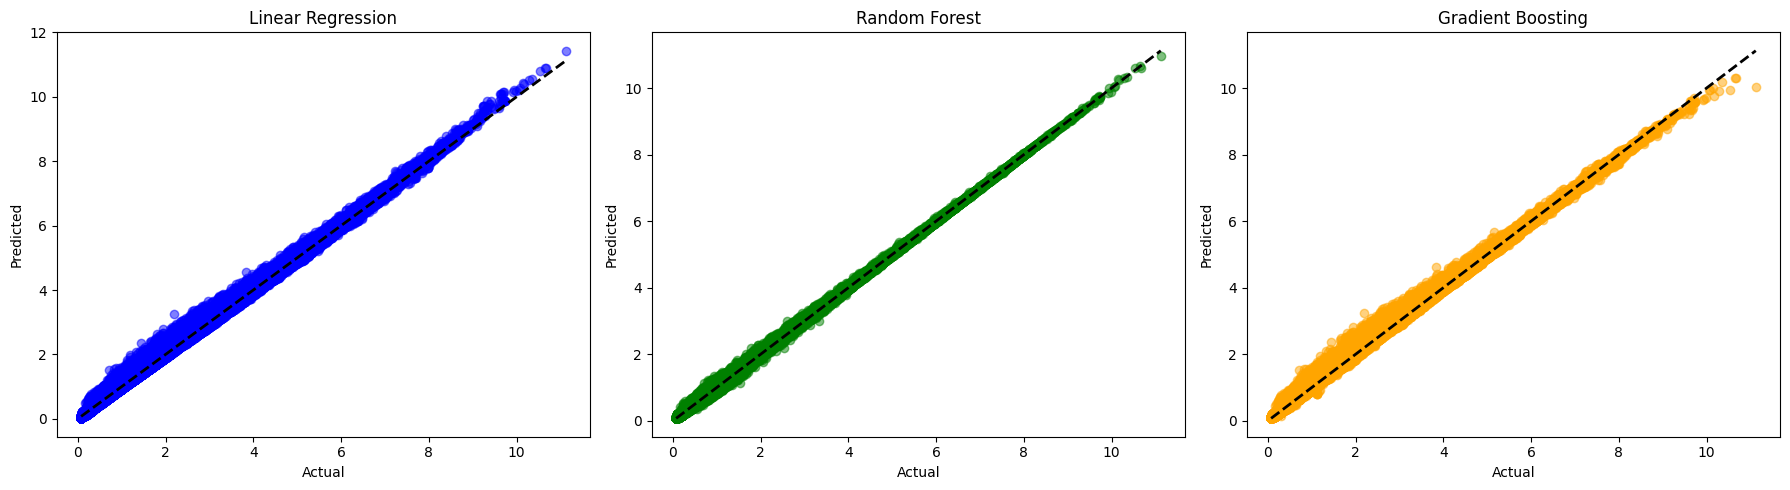

In [21]:
import matplotlib.pyplot as plt

# Predictions
y_pred_lr = lr.predict(X_imputed)
y_pred_rf = rf.predict(X_imputed)
y_pred_gb = gb.predict(X_imputed)

# Plotting
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y, y_pred_rf, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred_gb, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting")

plt.tight_layout()
plt.show()


In [6]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(lr1,f)

In [7]:
# Save this in a separate file or run once in a notebook
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pickle

df = pd.read_csv("cleaned_power_data.csv")
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=["Global_active_power"])

X = df.drop("Global_active_power", axis=1)
y = df["Global_active_power"]

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

model = LinearRegression()
model.fit(X_imputed, y)

# Save both model and imputer
with open("model.pkl", "wb") as f:
    pickle.dump((model, imputer, list(X.columns)), f)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Sample data: replace with your dataset
# X = features, y = target variable
# For example:
# X, y = your_data.drop('target', axis=1), your_data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [5, 10],           # number of trees
    'max_depth': [None, 2, 4, 6]         # max depth of trees
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                # 5-fold cross-validation
                           n_jobs=-1,           # use all processors
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate on test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'max_depth': None, 'n_estimators': 10}
Test MSE: 0.0011
